# Miscellaenous

This is Akhil, just trying stuff out. 

## Input Shattering

Gonna work from the ground up to implement some input shattering functions. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_points = np.linspace(-3, 3, 100)

In [5]:
cut_output = pd.cut(x_points, 10, include_lowest=True)

In [6]:
cut_output[0]

Interval(-3.0069999999999997, -2.3999999999999999, closed='right')

In [2]:
import numpy as np
np.random.seed(42)

In [3]:
#initial state is Gaussian mean 0, covariance sigma_0^2 I_m
#noise is Gaussian mean 0, covariance sigma_z^2 I_m
#cost 1 is k^2/m * squared l2 norm of u_1
# cost 2 is 1/m * squared l2 norm of x_2
def gen_initial_state(dimension, cov_term): 
    '''
    Generates a vector of dimension DIMENSION
    from a multivariate Gaussian distribution.
    Mean is always 0, and covariance is a scalar 
    multiple of the identity matrix.
    
    dimension: An positive integer. The dimension of the vector
    cov_term: A scalar to multiply the covariance matrix by. 
    '''
    return np.random.multivariate_normal(np.zeros(dimension), cov_term * np.eye(dimension))

In [4]:
def cost(control_1, x_2, k): 
    '''
    Cost function. 
    Input: 
    control_1: The u_1 vector
    x_2: The output after control 2
    k: A scalar term weighting the cost of control_1
    '''
    dim = len(control_1)
    return ((k**2)*np.linalg.norm(control_1)**2 + np.linalg.norm(x_2)**2) / dim

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def step_func(step_point): 
    def stepper(x): 
        if x > step_point: 
            return 1
        else: 
            return 0
    return stepper

In [4]:
zero_step = step_func(0)

In [7]:
#[-infty to -7] is -10
#[-7 to 0] is -4
#[0 to 7] is 4 
#[7 to infty] is 10 
def pw_step_function(x_arr): 
    return np.piecewise(x_arr, [x_arr < -7, (x_arr >= -7) & (x_arr < 0), (x_arr >= 0) & (x_arr < 7), x_arr > 7],
            [-10, -4, 4, 10])

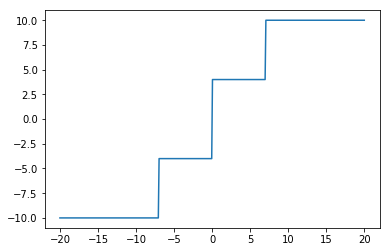

In [31]:
plt.plot(np.linspace(-20, 20, num=400), pw_step_function(np.linspace(-20, 20, num=400)))

In [34]:
pw_step_function(np.random.randint(low=-20, high=20, size=(30, 30))).reshape(-1)

{-10, -4, 0, 4, 10}

In [39]:
pw_step_function(np.array([-1, 0, 1]))

array([-4,  4,  4])

In [10]:
num_x0_points = 300
x0_test = np.linspace(-3*5, 3*5, num=num_x0_points)

In [11]:
def pw_step_function(x_arr): 
  '''
  Performs a piecewise step operation on every element of x_arr.
  x_arr: A numpy 1D array of real numbers of shape (N, )
  returns: A numpy 1D array of shape (N, ) whose values are in [-10, -4, 4, 10]
  '''
  return np.piecewise(x_arr, [x_arr < -7, (x_arr >= -7) & (x_arr < 0), (x_arr >= 0) & (x_arr < 7), x_arr > 7],
    [-10, -4, 4, 10])

In [12]:
x1_test = pw_step_function(x0_test)

In [13]:
x1_test[5].reshape(1, 1)

array([[-10.]])

In [14]:
z_test = np.random.normal(scale=1, size=num_x0_points)

In [15]:
z_test[5].reshape(1, 1)

array([[-0.23413696]])

In [16]:
def pw_step_function(x_arr): 
  '''
  Performs a piecewise step operation on every element of x_arr.
  x_arr: A numpy 1D array of real numbers of shape (N, )
  returns: A numpy 1D array of shape (N, ) whose values are in [-10, -4, 4, 10]
  '''
  return np.piecewise(x_arr, [x_arr < -7, (x_arr >= -7) & (x_arr < 0), (x_arr >= 0) & (x_arr < 7), x_arr > 7],
    [-10, -4, 4, 10])

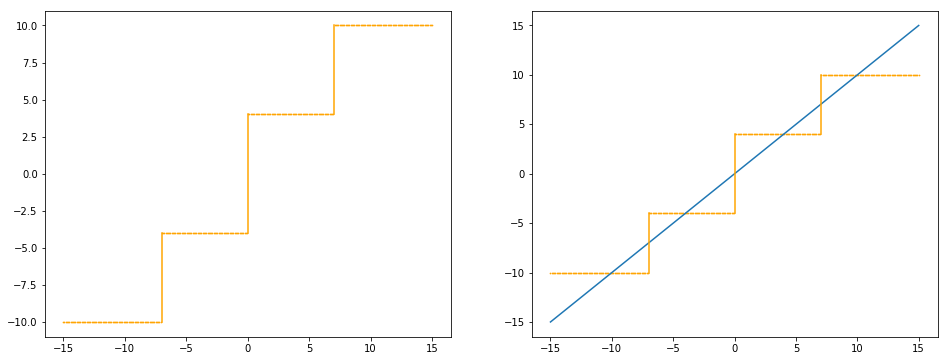

In [23]:
# return np.piecewise(x_arr, [x_arr < -7, (x_arr >= -7) & (x_arr < 0), (x_arr >= 0) & (x_arr < 7), x_arr > 7],
#     [-10, -4, 4, 10])
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(x0_test, pw_step_function(x0_test), c='orange', s=0.5)
plt.plot([-7, -7], [-10, -4], c='orange')
plt.plot([0, 0], [-4, 4], c='orange')
plt.plot([7, 7], [4, 10], c='orange')

plt.subplot(1, 2, 2)
plt.plot(x0_test, x0_test)
plt.scatter(x0_test, pw_step_function(x0_test), c='orange', s=0.5)
plt.plot([-7, -7], [-10, -4], c='orange', s=0.5)
plt.plot([0, 0], [-4, 4], c='orange', s=0.5)
plt.plot([7, 7], [4, 10], c='orange', s=0.5)

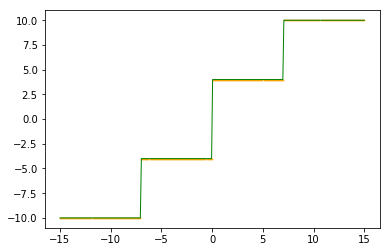

In [29]:
plt.scatter(x0_test, pw_step_function(x0_test), c='orange', s=0.5)
plt.plot(x0_test, pw_step_function(x0_test), c='green', lw=1)

# Plot from Txt

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [42]:
#python
METARESULTSFILEPATH = "2d/results/meta_basic_cloud1"
meta_results_file = METARESULTSFILEPATH + '.txt'


with open(meta_results_file, 'r') as f:
   data = f.readlines()
   f.close()

x0_list = []
x1_list = []

repeat_run_list = [6,7, 1000, 1001] #Enter the metaresultsfilepath and desired run numbers here to replicate
for line in data[1:]:
    clean_line = line.replace('\n', '')
#     print(clean_line)
    k, dat_path, checkpoint_path, avg_cost_test_rep, _ = clean_line.split(' ')

    if int(k) in repeat_run_list:
        with open(dat_path, 'rb') as f:
            hyperparameters_dict = pickle.load(f)
            f.close()
        # for key in hyperparameters_dict.keys()
        print(hyperparameters_dict.keys())
        print(np.mean(hyperparameters_dict['cost']))
        x0_list.append(hyperparameters_dict['x0'])
        x1_list.append(hyperparameters_dict['x1'])
#         print('x0: ', hyperparameters_dict['x0'])
#         print('x1: ', hyperparameters_dict['x1'])

dict_keys(['x1', 'tup', 'u2', 'tup_str', 'cost', 'x0', 'params', 'x2'])
6.46622802237
dict_keys(['x1', 'tup', 'u2', 'tup_str', 'cost', 'x0', 'params', 'x2'])
6.43453343507


In [29]:
x_axis = x0_list[0][:, 0]
y_axis = x0_list[0][:, 1]

x1_test = x1_list[0]
u1_test = np.array(x1_test - x0_list[0])
num_test_intervals = len(x1_list[0])

In [34]:
x0_list[0].shape

(100, 2)

In [35]:
x1_test.shape

(100, 2)

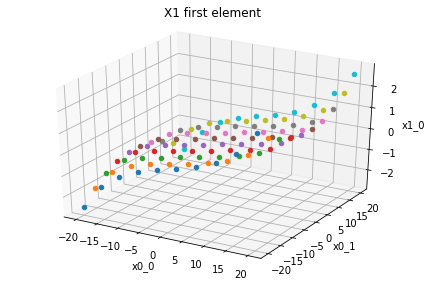

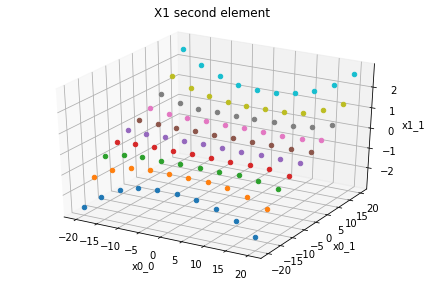

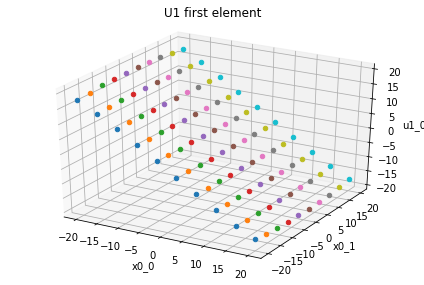

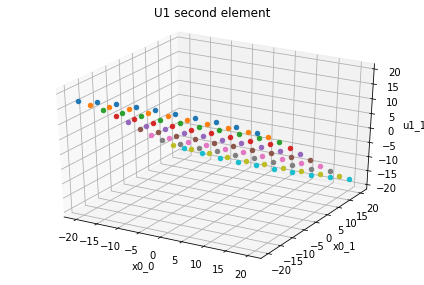

In [38]:
from mpl_toolkits.mplot3d import Axes3D
# x_axis = np.linspace(-15, 15, num=num_test_intervals)
# y_axis = np.linspace(-15, 15, num=num_test_intervals)

# PLOT X1_0

fig = plt.figure()
fig.suptitle('X1 first element')
ax = fig.gca(projection='3d')
for i in range(num_test_intervals):
        ax.scatter(x_axis[i], y_axis[i], x1_test[i][0])
#         ax.scatter(x_axis[i], y_axis[j], x1_test[1,i,j])
ax.set_xlabel('x0_0')
ax.set_ylabel('x0_1')
ax.set_zlabel('x1_0')
plt.tight_layout()
plt.show()

# PLOT X1_1
fig = plt.figure()
fig.suptitle('X1 second element')
ax = fig.gca(projection='3d')
for i in range(num_test_intervals):
        ax.scatter(x_axis[i], y_axis[i], x1_test[i][1])
#         ax.scatter(x_axis[i], y_axis[j], x1_test[1,i,j])
ax.set_xlabel('x0_0')
ax.set_ylabel('x0_1')
ax.set_zlabel('x1_1')
plt.tight_layout()
plt.show()

# PLOT U1_0
fig = plt.figure()
fig.suptitle('U1 first element')
ax = fig.gca(projection='3d')
for i in range(num_test_intervals):
        ax.scatter(x_axis[i], y_axis[i], u1_test[i][0])
#         ax.scatter(x_axis[i], y_axis[j], x1_test[1,i,j])
ax.set_xlabel('x0_0')
ax.set_ylabel('x0_1')
ax.set_zlabel('u1_0')
plt.tight_layout()
plt.show()

# fig = plt.figure()
fig = plt.figure()
fig.suptitle('U1 second element')
ax = fig.gca(projection='3d')
for i in range(num_test_intervals):
        ax.scatter(x_axis[i], y_axis[i], u1_test[i][1])
#         ax.scatter(x_axis[i], y_axis[j], x1_test[1,i,j])
ax.set_xlabel('x0_0')
ax.set_ylabel('x0_1')
ax.set_zlabel('u1_1')
plt.tight_layout()
plt.show()

# Importance Sampling

In [2]:
import scipy.stats
import numpy as np

In [6]:
x_stddev = 5
input_dimension = 3
x0_distribution = scipy.stats.multivariate_normal(cov = (x_stddev ** 2) * np.eye(input_dimension))

In [8]:
x0_distribution.pdf(np.array([0, 1, 0]))

0.00049789102164932131

In [11]:
x0_distribution.pdf(np.random.normal(size=(10, 3))) * np.random.normal(size=(10,))

array([  8.19961128e-06,   4.70538812e-04,   2.23299860e-04,
         9.48638671e-05,   1.88861182e-03,  -1.17529384e-03,
        -2.16841210e-04,  -2.22201577e-04,  -1.03160109e-04,
        -3.40513189e-04])

In [12]:
np.sum(x0_distribution.pdf(np.random.normal(size=(10, 3))))

0.0048484126671678946

# Save Weights to File

In [15]:
import h5py

In [16]:
# In [2]: import h5py
# In [3]: a = np.random.random(size=(100,20))
# In [4]: h5f = h5py.File('data.h5', 'w')
# In [5]: h5f.create_dataset('dataset_1', data=a)
# Out[5]: <HDF5 dataset "dataset_1": shape (100, 20), type "<f8">

# In [6]: h5f.close()
# You can then load that data back in using: '

# In [10]: h5f = h5py.File('data.h5','r')
# In [11]: b = h5f['dataset_1'][:]
# In [12]: h5f.close()

# In [13]: np.allclose(a,b)
# Out[13]: True


In [19]:
arr = np.random.randn(100, 100)

In [22]:
test_file = h5py.File('data2.h5', 'w')

In [23]:
test_file.create_dataset('arr_test', data = arr)

<HDF5 dataset "arr_test": shape (100, 100), type "<f8">

In [24]:
test_file.close()

In [25]:
file_opened = h5py.File('data2.h5', 'r')
b = file_opened['arr_test']

In [32]:
with h5py.File('network_weights.h5', 'r') as f: 
    for k in list(f.keys()):
        print(k)

W1_epoch_0
W1_epoch_100
W1_epoch_1000
W1_epoch_150
W1_epoch_200
W1_epoch_250
W1_epoch_300
W1_epoch_350
W1_epoch_400
W1_epoch_450
W1_epoch_50
W1_epoch_500
W1_epoch_550
W1_epoch_600
W1_epoch_650
W1_epoch_700
W1_epoch_750
W1_epoch_800
W1_epoch_850
W1_epoch_900
W1_epoch_950
W2_epoch_0
W2_epoch_100
W2_epoch_1000
W2_epoch_150
W2_epoch_200
W2_epoch_250
W2_epoch_300
W2_epoch_350
W2_epoch_400
W2_epoch_450
W2_epoch_50
W2_epoch_500
W2_epoch_550
W2_epoch_600
W2_epoch_650
W2_epoch_700
W2_epoch_750
W2_epoch_800
W2_epoch_850
W2_epoch_900
W2_epoch_950
W3_epoch_0
W3_epoch_100
W3_epoch_1000
W3_epoch_150
W3_epoch_200
W3_epoch_250
W3_epoch_300
W3_epoch_350
W3_epoch_400
W3_epoch_450
W3_epoch_50
W3_epoch_500
W3_epoch_550
W3_epoch_600
W3_epoch_650
W3_epoch_700
W3_epoch_750
W3_epoch_800
W3_epoch_850
W3_epoch_900
W3_epoch_950
W4_epoch_0
W4_epoch_100
W4_epoch_1000
W4_epoch_150
W4_epoch_200
W4_epoch_250
W4_epoch_300
W4_epoch_350
W4_epoch_400
W4_epoch_450
W4_epoch_50
W4_epoch_500
W4_epoch_550
W4_epoch_600
W4_epoc